In [3]:
from shapely.geometry import Polygon
import pandas as pd, numpy as np
import geopandas
import matplotlib.pyplot as plot

Define some polygons to serve as census tracts (yellow) and station buffers (green; they're squares right now but bear with me I'm a n00b). The plot shows that the Stop1 buffer overlaps with Tract1 and Tract2 and the Stop2 buffer overlaps with Tract2 and Tract3

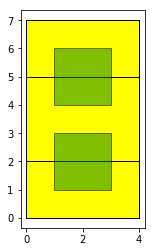

In [14]:
tracts = geopandas.GeoSeries([Polygon([(0,0), (0,2), (4,2), (4,0)]),
                              Polygon([(0,2), (0,5), (4,5), (4,2)]),
                              Polygon([(0,5), (0,7), (4,7), (4,5)])])
                       
stops = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                             Polygon([(1,4), (3,4), (3,6), (1,6)])])

tracts = geopandas.GeoDataFrame({'geometry': tracts, 'tracts':['Tract1','Tract2','Tract3']})
stops = geopandas.GeoDataFrame({'geometry': stops, 'stops':['Stop1','Stop2']})

ax = tracts.plot(color='yellow', edgecolor='k');
stops.plot(ax=ax, color='green', edgecolor='k', alpha=0.5);

Now we perform the overlay command and specify union. The resulting output gives us the polygon where the stops and the tracts overlap! 

In [15]:
res_union = geopandas.overlay(tracts, stops, how='union')

res_union

,stops,tracts,geometry
0,Stop1,Tract1,"POLYGON ((1 2, 3 2, 3 1, 1 1, 1 2))"
1,Stop1,Tract2,"POLYGON ((3 2, 1 2, 1 3, 3 3, 3 2))"
2,Stop2,Tract2,"POLYGON ((1 5, 3 5, 3 4, 1 4, 1 5))"
3,Stop2,Tract3,"POLYGON ((3 5, 1 5, 1 6, 3 6, 3 5))"
4,NaN,Tract1,"POLYGON ((0 0, 0 2, 1 2, 1 1, 3 1, 3 2, 4 2, 4..."
5,NaN,Tract2,"POLYGON ((0 2, 0 5, 1 5, 1 4, 3 4, 3 5, 4 5, 4..."
6,NaN,Tract3,"POLYGON ((0 5, 0 7, 4 7, 4 5, 3 5, 3 6, 1 6, 1..."


In [17]:
res_union2 = geopandas.overlay(tracts, stops, how='intersection')

res_union2

,tracts,stops,geometry
0,Tract1,Stop1,"POLYGON ((1 2, 3 2, 3 1, 1 1, 1 2))"
1,Tract2,Stop1,"POLYGON ((3 2, 1 2, 1 3, 3 3, 3 2))"
2,Tract2,Stop2,"POLYGON ((1 5, 3 5, 3 4, 1 4, 1 5))"
3,Tract3,Stop2,"POLYGON ((3 5, 1 5, 1 6, 3 6, 3 5))"


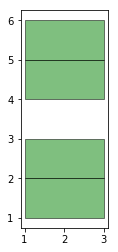

In [7]:
res_union2.plot(color='green', edgecolor='k', alpha=0.5);

Next up is to test what happens when the stops overlap as well... Change the stop geometry to move Stop2 down so there is a partial overlap with Stop1.

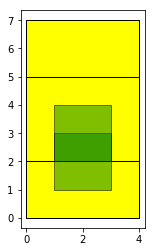

In [8]:
tracts = geopandas.GeoSeries([Polygon([(0,0), (0,2), (4,2), (4,0)]),
                              Polygon([(0,2), (0,5), (4,5), (4,2)]),
                              Polygon([(0,5), (0,7), (4,7), (4,5)])])
                       
stops = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                             Polygon([(1,2), (3,2), (3,4), (1,4)])])

tracts = geopandas.GeoDataFrame({'geometry': tracts, 'tracts':['Tract1','Tract2','Tract3']})
stops = geopandas.GeoDataFrame({'geometry': stops, 'stops':['Stop1','Stop2']})

ax = tracts.plot(color='yellow', edgecolor='k');
stops.plot(ax=ax, color='green', edgecolor='k', alpha=0.5);

In [9]:
res_union = geopandas.overlay(tracts, stops, how='union')

res_union

,stops,tracts,geometry
0,Stop1,Tract1,"POLYGON ((1 2, 3 2, 3 1, 1 1, 1 2))"
1,Stop1,Tract2,"POLYGON ((3 2, 1 2, 1 3, 3 3, 3 2))"
2,Stop2,Tract2,"POLYGON ((3 2, 1 2, 1 4, 3 4, 3 2))"
3,NaN,Tract1,"POLYGON ((0 0, 0 2, 1 2, 1 1, 3 1, 3 2, 4 2, 4..."
4,NaN,Tract2,"POLYGON ((0 2, 0 5, 4 5, 4 2, 3 2, 3 3, 3 4, 1..."
5,NaN,Tract3,"POLYGON ((0 5, 0 7, 4 7, 4 5, 0 5))"


Seems to work fine! Stop2 union is only with Tract2 and it's for the full buffer. No funny business!

In [11]:
res_union3 = geopandas.overlay(tracts, stops, how='intersection')

res_union3

,tracts,stops,geometry
0,Tract1,Stop1,"POLYGON ((1 2, 3 2, 3 1, 1 1, 1 2))"
2,Tract2,Stop1,"POLYGON ((3 2, 1 2, 1 3, 3 3, 3 2))"
3,Tract2,Stop2,"POLYGON ((3 2, 1 2, 1 4, 3 4, 3 2))"


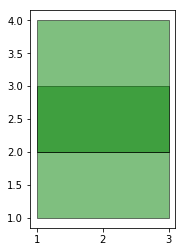

In [12]:
res_union3.plot(color='green', edgecolor='k', alpha=0.5);